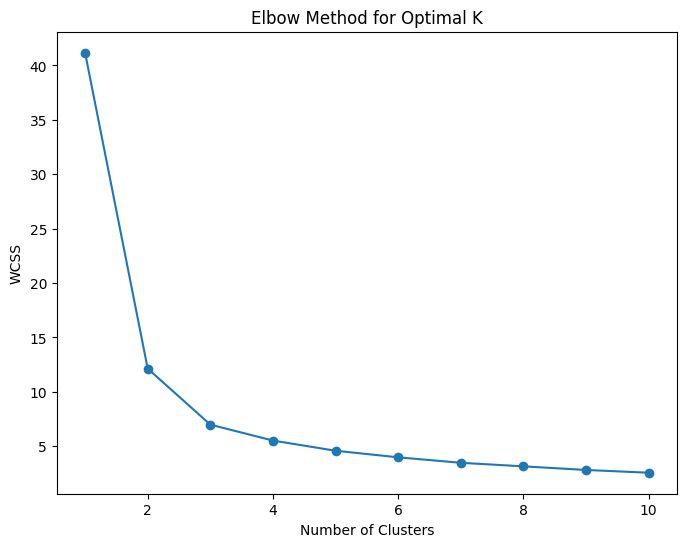


K=2
ARI: 0.568
Silhouette Score: 0.664
Misclassified points: 50 / 150


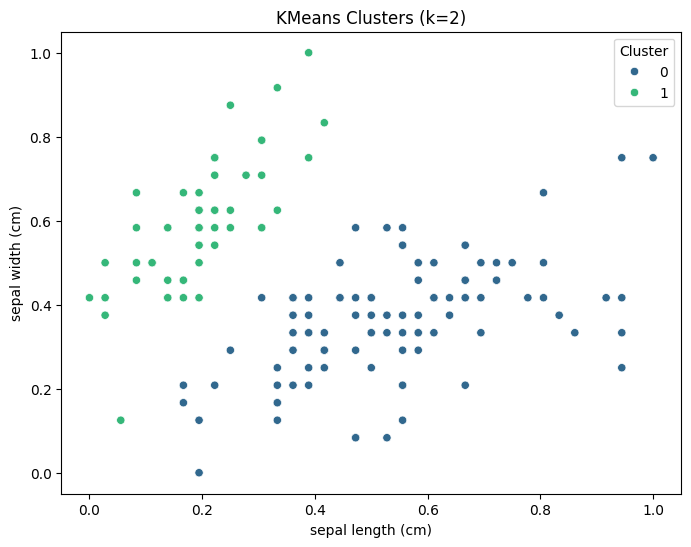


K=3
ARI: 0.716
Silhouette Score: 0.564
Misclassified points: 17 / 150


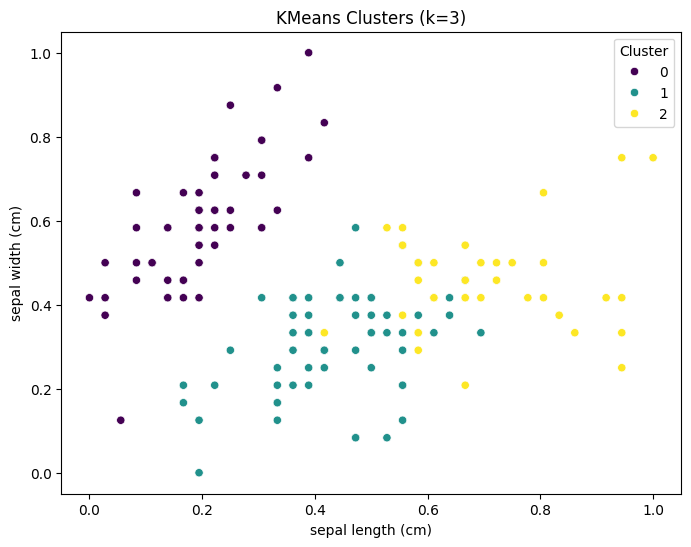


K=4
ARI: 0.623
Silhouette Score: 0.397
Misclassified points: 21 / 150


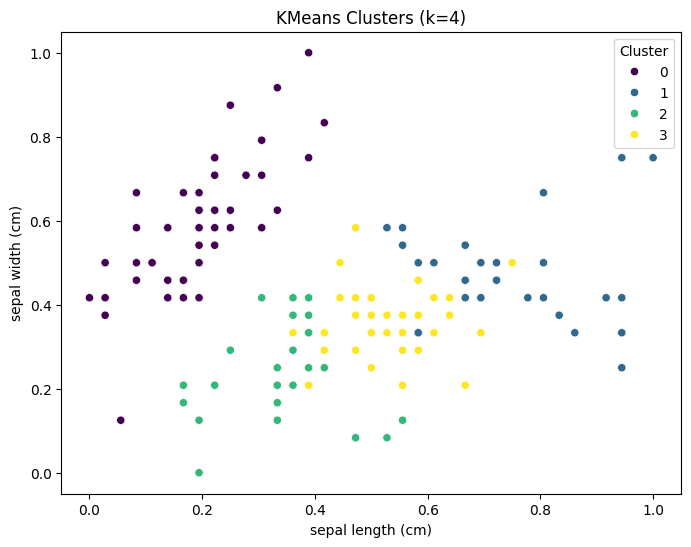


K=5
ARI: 0.469
Silhouette Score: 0.260
Misclassified points: 21 / 150


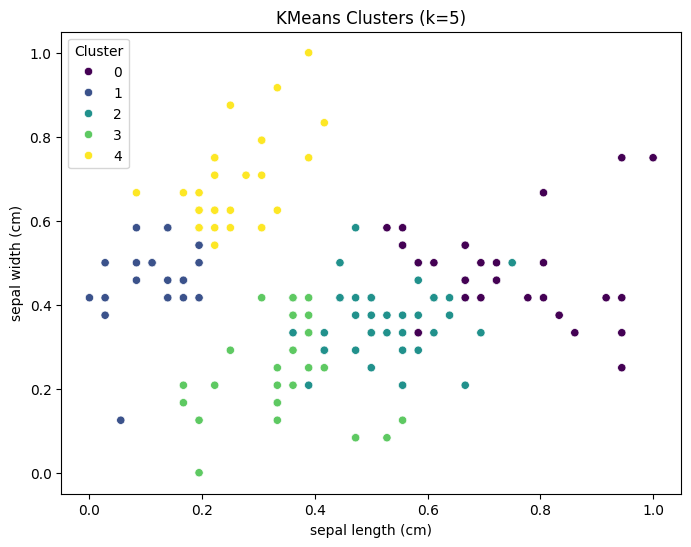

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np

# Load & preprocess data
def load_and_preprocess_iris():
    iris = load_iris(as_frame=True)
    df = iris.frame.copy()
    features = iris.data
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    df[iris.feature_names] = scaled_features
    return df, iris.target, iris.target_names

# Apply KMeans
def apply_kmeans_clustering(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df.iloc[:, :-1])
    df['Cluster'] = kmeans.labels_
    return df, kmeans

# Find best mapping between clusters and species
def map_clusters_to_species(true_labels, cluster_labels):
    mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        majority_label = np.bincount(true_labels[mask]).argmax()
        mapping[cluster] = majority_label
    return mapping

# Analyze clusters
def analyze_cluster_characteristics(df, target):
    mapping = map_clusters_to_species(target, df['Cluster'].values)
    predicted_species = [mapping[c] for c in df['Cluster']]
    misclassified = np.sum(predicted_species != target)
    return misclassified

# Elbow method
def plot_elbow_method(df):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df.iloc[:, :-1])
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS")
    plt.show()

# Main
def main():
    df, target, target_names = load_and_preprocess_iris()

    # Step 1: Elbow Method
    plot_elbow_method(df)

    # Step 2: Try multiple Ks
    for k in [2, 3, 4, 5]:
        df_k, kmeans_k = apply_kmeans_clustering(df.copy(), k)
        ari = adjusted_rand_score(target, df_k['Cluster'])
        sil = silhouette_score(df_k.iloc[:, :-1], df_k['Cluster'])
        misclassified = analyze_cluster_characteristics(df_k, target)
        
        print(f"\nK={k}")
        print(f"ARI: {ari:.3f}")
        print(f"Silhouette Score: {sil:.3f}")
        print(f"Misclassified points: {misclassified} / {len(df)}")

        # Scatter plot (using first two features)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            data=df_k,
            x=df_k.columns[0],
            y=df_k.columns[1],
            hue='Cluster',
            palette='viridis'
        )
        plt.title(f"KMeans Clusters (k={k})")
        plt.show()

if __name__ == "__main__":
    main()
